<a href="https://colab.research.google.com/github/RaneemQaddoura/EvoCluster/blob/master/evocluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>EvoCluster</h1>
An Open-Source Nature-Inspired Optimization Clustering Framework in Python

EvoCluster is an open source and cross-platform framework implemented in Python which includes the most well-known and recent nature-inspired metaheuristic  optimizers  that  are  customized  to  perform  partitional  clustering tasks.  

The  goal  of  this  framework  is  to  provide  a  user-friendly  and  customizable implementation of the metaheuristic based clustering algorithms which can be utilized by experienced and non-experienced users for different applications.

The framework can also be used by researchers who can benefit from the implementation of the metaheuristic optimizers for their research studies. 

EvoCluster can be extended by designing other optimizers, including more objective func-tions, adding other evaluation measures, and using more data sets. 

The current implementation  of  the  framework  includes  ten  metaheristic  optimizers,  thirtydatasets,  five  objective  functions,  and  twelve  evaluation  measures.  

The full list of implemented optimizers is available here https://github.com/7ossam81/EvoloPy/wiki/List-of-optimizers

<h2>Features</h2>

*   Ten nature-inspired metaheuristic optimizers are implemented.
*   The implimentation uses the fast array manipulation using [NumPy] (http://www.numpy.org/).
*   Matrix support using [SciPy's] (https://www.scipy.org/) package.
*   More optimizers are comming soon

<h2>Installation</h2>

Python 3.xx is required.

<h2>GitHub</h2>

Clone the Git repository from GitHub:
git clone https://github.com/RaneemQaddoura/EvoCluster.git

In [0]:
!git clone https://github.com/RaneemQaddoura/EvoCluster.git

In [0]:
# Change working directory
import os
os.chdir("EvoCluster/")

<h2>Install Packages</h2>

In [0]:
#Install NumPy, SciPy, sklearn, pandas and matplotlib
!pip install -r requirements.txt

<h2>User Preferences</h2>

In [0]:
# Select optimizers
# "SSA","PSO","GA","BAT","FFA","GWO","WOA","MVO","MFO","CS"
optimizer=["SSA","PSO","GA","GWO"]

In [0]:
# Select objective function
# "SSE","TWCV","SC","DB","DI"
objectivefunc=["SSE","TWCV"] 

In [0]:
# Select data sets
#"aggregation","aniso","appendicitis","balance","banknote","blobs","Blood","circles","diagnosis_II","ecoli","flame","glass","heart","ionosphere","iris","iris2D","jain","liver","moons","mouse","pathbased","seeds","smiley","sonar","varied","vary-density","vertebral2","vertebral3","wdbc","wine"
dataset_List = ["iris","aggregation"]

In [0]:
# Select number of repetitions for each experiment. 
# To obtain meaningful statistical results, usually 30 independent runs are executed for each algorithm.
NumOfRuns=3

In [0]:
# Select general parameters for all optimizers (population size, number of iterations) ....
params = {'PopulationSize' : 50, 'Iterations' : 100}

In [0]:
#Export results?
export_flags = {'Export_avg':True, 'Export_details':True, 'Export_details_labels':True, 
'Export_convergence':True, 'Export_boxplot':True}

<h2>Run Framework</h2>

In [0]:
# Run EvoCluster
from optimizer_run import run
run(optimizer, objectivefunc, dataset_List, NumOfRuns, params, export_flags)

In [0]:
#import some useful packages to view the results' files in colab
import pandas as pd
from IPython.display import Image
import os
import datetime
import ipywidgets as widgets

In [216]:
#find the folder name having the experiments file. For multiple experiments you can change the index of the foldernames
foldernames = [filename for filename in os.listdir() if filename.startswith(str(datetime.datetime.now().year))]
drop_folder = widgets.Dropdown(options=foldernames, description='Select folder:')
drop_folder

Dropdown(description='Select folder:', options=('2020-05-01-08-43-32',), value='2020-05-01-08-43-32')

In [217]:
#Show the average results file
foldername = drop_folder.value
filename = foldername +'/experiment.csv' 
df = pd.read_csv(filename)
df.head(3)

,Dataset,Optimizer,objfname,ExecutionTime,SSE,Purity,Entropy,HS,CS,VM,AMI,ARI,Fmeasure,TWCV,SC,Accuracy,DI,DB,STDev,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,Iter7,Iter8,Iter9,Iter10,Iter11,Iter12,Iter13,Iter14,Iter15,Iter16,Iter17,Iter18,Iter19,Iter20,Iter21,...,Iter61,Iter62,Iter63,Iter64,Iter65,Iter66,Iter67,Iter68,Iter69,Iter70,Iter71,Iter72,Iter73,Iter74,Iter75,Iter76,Iter77,Iter78,Iter79,Iter80,Iter81,Iter82,Iter83,Iter84,Iter85,Iter86,Iter87,Iter88,Iter89,Iter90,Iter91,Iter92,Iter93,Iter94,Iter95,Iter96,Iter97,Iter98,Iter99,Iter100
0,iris,SSA,SSE,10.41,2.83,0.96,0.14,0.86,0.86,0.86,0.86,0.89,0.53,2.83,0.21,0.89,0.82,0.63,0.06,0.0,18.73,12.50,8.33,7.92,7.11,6.72,6.30,6.22,6.13,6.09,5.94,5.61,5.38,4.78,4.78,4.67,4.67,4.67,4.40,4.28,...,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83
1,aggregation,SSA,SSE,51.10,11.00,0.89,0.11,0.88,0.79,0.84,0.83,0.73,0.04,10.96,0.27,0.73,0.96,0.72,0.05,0.0,17.61,17.54,17.28,17.28,17.28,17.14,16.97,16.88,16.21,15.42,15.42,14.66,14.66,14.66,14.47,14.47,14.36,14.25,14.16,14.01,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
2,iris,SSA,TWCV,11.78,58.57,0.96,0.14,0.86,0.86,0.86,0.86,0.89,0.35,2.83,0.21,0.89,0.82,0.63,0.13,0.0,3.31,3.02,2.97,2.97,2.94,2.94,2.89,2.87,2.87,2.87,2.87,2.87,2.87,2.86,2.86,2.85,2.85,2.85,2.85,2.84,...,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83


In [209]:
#Show the detailed results file
filename = foldername +'/experiment_details.csv' 
df = pd.read_csv(filename)
df.head(9)

,Dataset,Optimizer,objfname,ExecutionTime,SSE,Purity,Entropy,HS,CS,VM,AMI,ARI,Fmeasure,TWCV,SC,Accuracy,DI,DB,STDev,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,Iter7,Iter8,Iter9,Iter10,Iter11,Iter12,Iter13,Iter14,Iter15,Iter16,Iter17,Iter18,Iter19,Iter20,Iter21,...,Iter61,Iter62,Iter63,Iter64,Iter65,Iter66,Iter67,Iter68,Iter69,Iter70,Iter71,Iter72,Iter73,Iter74,Iter75,Iter76,Iter77,Iter78,Iter79,Iter80,Iter81,Iter82,Iter83,Iter84,Iter85,Iter86,Iter87,Iter88,Iter89,Iter90,Iter91,Iter92,Iter93,Iter94,Iter95,Iter96,Iter97,Iter98,Iter99,Iter100
0,iris,SSA,SSE,10.51,2.83,0.96,0.14,0.86,0.86,0.86,0.86,0.89,0.96,2.83,0.21,0.89,0.82,0.63,0.06,0.0,16.54,12.25,9.00,7.79,6.13,6.13,6.13,6.13,6.13,6.13,6.13,5.61,5.61,4.81,4.81,4.74,4.74,4.74,4.13,3.78,...,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83
1,iris,SSA,SSE,10.37,2.83,0.96,0.14,0.86,0.86,0.86,0.86,0.89,0.31,2.83,0.21,0.89,0.82,0.63,0.06,0.0,22.50,14.58,8.48,8.48,8.48,8.48,8.48,8.46,8.18,8.05,7.59,7.12,6.43,5.48,5.48,5.48,5.48,5.48,5.48,5.48,...,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83
2,iris,SSA,SSE,10.34,2.83,0.96,0.14,0.86,0.86,0.86,0.86,0.89,0.31,2.83,0.21,0.89,0.82,0.63,0.06,0.0,17.16,10.68,7.50,7.50,6.73,5.54,4.28,4.09,4.09,4.09,4.09,4.09,4.09,4.04,4.04,3.78,3.78,3.78,3.59,3.57,...,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83
3,aggregation,SSA,SSE,50.90,11.17,0.89,0.11,0.87,0.78,0.83,0.82,0.72,0.13,11.07,0.27,0.72,0.97,0.76,0.04,0.0,19.06,18.83,18.83,18.83,18.83,18.40,17.91,17.91,17.91,15.53,15.53,14.40,14.40,14.40,14.40,14.40,14.40,14.40,14.20,13.81,...,11.19,11.19,11.19,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.18,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17,11.17
4,aggregation,SSA,SSE,51.22,10.91,0.90,0.10,0.88,0.79,0.84,0.83,0.73,0.00,10.90,0.27,0.73,0.96,0.70,0.05,0.0,16.27,16.27,15.49,15.49,15.49,15.49,15.49,15.23,15.17,15.17,15.17,14.05,14.05,14.05,14.05,14.05,14.04,14.01,13.94,13.89,...,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91
5,aggregation,SSA,SSE,51.17,10.91,0.90,0.10,0.88,0.80,0.84,0.84,0.73,0.00,10.91,0.27,0.73,0.96,0.70,0.05,0.0,17.51,17.51,17.51,17.51,17.51,17.51,17.51,17.51,15.54,15.54,15.54,15.54,15.54,15.54,14.96,14.96,14.64,14.35,14.35,14.35,...,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91,10.91
6,iris,SSA,TWCV,12.14,76.86,0.96,0.14,0.86,0.86,0.86,0.86,0.89,0.31,2.83,0.21,0.89,0.82,0.63,0.10,0.0,2.92,2.92,2.92,2.92,2.92,2.92,2.89,2.89,2.89,2.89,2.89,2.89,2.89,2.88,2.88,2.88,2.88,2.88,2.88,2.86,...,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83
7,iris,SSA,TWCV,11.57,32.83,0.96,0.14,0.86,0.86,0.86,0.86,0.89,0.37,2.83,0.21,0.89,0.82,0.63,0.15,0.0,3.37,3.04,2.88,2.88,2.88,2.88,2.88,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,...,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83,2.83
8,iris,SSA,T

In [285]:
#Show the labels results file
filename = foldername +'/experiment_details_Labels.csv' 
header_names=['Dataset','Optimizer','objfname'] + ['label' + str(i) for i in range(50)]
df = pd.read_csv(filename,names=header_names,dtype=object)[1:]
df.head(9)

,Dataset,Optimizer,objfname,label0,label1,label2,label3,label4,label5,label6,label7,label8,label9,label10,label11,label12,label13,label14,label15,label16,label17,label18,label19,label20,label21,label22,label23,label24,label25,label26,label27,label28,label29,label30,label31,label32,label33,label34,label35,label36,label37,label38,label39,label40,label41,label42,label43,label44,label45,label46,label47,label48,label49
1,iris,SSA,SSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,iris,SSA,SSE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,iris,SSA,SSE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,aggregation,SSA,SSE,1,1,1,1,1,1,1,1,1,1,6,6,6,1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
5,aggregation,SSA,SSE,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,aggregation,SSA,SSE,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,iris,SSA,TWCV,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,iris,SSA,TWCV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,iris,SSA,TWCV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [214]:
#Select convergence curve to show
filenames = [filename for filename in os.listdir(foldername) if filename.startswith('convergence')]

drop_plot_convergence = widgets.Dropdown(options=filenames, description='Select plot:')
drop_plot_convergence

Dropdown(description='Select plot:', options=('convergence-iris-TWCV.png', 'convergence-iris-SSE.png', 'conver…

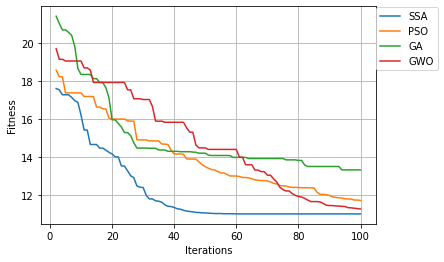

In [218]:
#Show selected convergence curve
Image(foldername +'/' + drop_plot_convergence.value)

In [211]:
#Select convergence curve to show
filenames = [filename for filename in os.listdir(foldername) if filename.startswith('boxplot')]

drop_boxplot = widgets.Dropdown(options=filenames, description='Select plot:')
drop_boxplot

Dropdown(description='Select plot:', options=('boxplot-iris-SSE-Accuracy.png', 'boxplot-aggregation-SSE-ARI.pn…

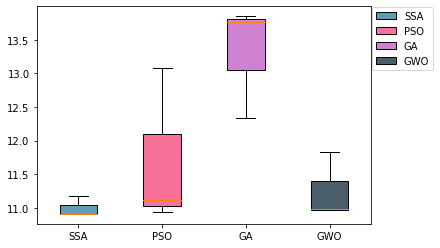

In [219]:
#Show selected convergence curve
Image(foldername +'/' + drop_boxplot.value)

<h2>Citation Request</h2>

Please include these citations if you plan to use this Framework:


*   Qaddoura, Raneem, Hossam Faris, Ibrahim Aljarah, and Pedro A. Castillo. "EvoCluster: An Open-Source Nature-Inspired Optimization Clustering Framework in Python." In International Conference on the Applications of Evolutionary Computation (Part of EvoStar), pp. 20-36. Springer, Cham, 2020.
*   Ruba Abu Khurma, Ibrahim Aljarah, Ahmad Sharieh, and Seyedali Mirjalili. Evolopy-fs: An open-source nature-inspired optimization framework in python for feature selection. In Evolutionary Machine Learning Techniques, pages 131–173. Springer, 2020
*   Hossam Faris, Ibrahim Aljarah, Sayedali Mirjalili, Pedro Castillo, and J.J Merelo. "EvoloPy: An Open-source Nature-inspired Optimization Framework in Python". In Proceedings of the 8th International Joint Conference on Computational Intelligence - Volume 3: ECTA,ISBN 978-989-758-201-1, pages 171-177.
*   Raneem Qaddoura, Hossam Faris, and Ibrahim Aljarah*. An efficient clustering algorithm based on the k-nearest neighbors with an indexing ratio. International Journal of Machine Learning and Cybernetics, pages 1–40, 2019.
*   Ibrahim Aljarah, Majdi Mafarja, Ali Asghar Heidari, Hossam Faris, and Seyedali Mirjalili. Clustering analysis using a novel locality-informed grey wolf-inspired clustering approach. Knowledge and Information Systems, pages 1–33, 2019.
*   Sarah Shukri, Hossam Faris, Ibrahim Aljarah*, Seyedali Mirjalili, and Ajith Abraham. Evolutionary static and dynamic clustering algorithms based on multi-verse optimizer. Engineering Applications of Artificial Intelligence, 72:54–66, 2018.
*   Ibrahim Aljarah, Majdi Mafarja, Ali Asghar Heidari, Hossam Faris, and Seyedali Mirjalili. Multiverse optimizer: Theory, literature review, and application in a data clustering. In Nature-Inspired Optimizers: Theories, Literature Reviews and Applications, pages 123–141. Springer International Publishing, Cham, 2020






